# AI Assignment 2

## Problem 1

In [113]:
import random
import time
import matplotlib.pyplot as plt
from collections import Counter
from functools import reduce
from copy import deepcopy
from IPython.display import display, clear_output

## Phases of Genetic Algorithm:

In [122]:
# initialization
number_of_bits = 8 # Choromosome Length
population_size = 4
inititial_population = []
for i in range(0, population_size):
    genome = []
    for j in range(0, number_of_bits):
        genome.append(random.randrange(2))
    inititial_population.append(genome)

inititial_population

[[0, 1, 0, 0, 0, 0, 0, 1],
 [1, 1, 0, 1, 1, 1, 1, 1],
 [1, 0, 1, 1, 0, 0, 0, 1],
 [1, 0, 0, 0, 0, 1, 1, 0]]

In [124]:
from collections import Counter
def fitness_function_count(genome): # Chromosome
    print(Counter(genome)[1])
    
def fitness_function_convert(genome): # Chromosome
    genome.reverse()
    int_val = 0
    for index, i in enumerate(genome):
        int_val += (2**index)  * int(i)
    return int_val

def find_max_val_of_population(population): 
    max_population = []
    max_population_index = 0
    max_val = -1
    for index,genome in enumerate(population):
        genome_fitness = fitness_function_convert(deepcopy(genome))
        if genome_fitness > max_val:
            max_val = genome_fitness
            max_population_index = index    
            max_population = genome
    return max_val

In [129]:
# selection
selection_size = population_size - 1
min_population = []
min_population_index = 0
min_val = 2**len(inititial_population[0])
max_population = []
max_population_index = 0
max_val = -1
for index,genome in enumerate(inititial_population):
    genome_fitness = fitness_function_convert(deepcopy(genome))
    if genome_fitness < min_val:
        min_val = genome_fitness
        min_population_index = index    
        min_population = genome
    if genome_fitness > max_val:
        max_val = genome_fitness
        max_population_index = index    
        max_population = genome
    
print(min_val)
print(min_population)
print(min_population_index)
print(inititial_population)

# selected_population = sorted(inititial_population, key = lambda x: Counter(x)[1], reverse=True)[:selection_size]
inititial_population.pop(min_population_index)
selected_population = inititial_population
selected_population += [max_population]
selected_population

223
[1, 1, 0, 1, 1, 1, 1, 1]
0
[[1, 1, 0, 1, 1, 1, 1, 1], [1, 1, 0, 1, 1, 1, 1, 1], [1, 1, 0, 1, 1, 1, 1, 1], [1, 1, 0, 1, 1, 1, 1, 1]]


[[1, 1, 0, 1, 1, 1, 1, 1],
 [1, 1, 0, 1, 1, 1, 1, 1],
 [1, 1, 0, 1, 1, 1, 1, 1],
 [1, 1, 0, 1, 1, 1, 1, 1]]

In [130]:
# crossover
crossover_location = int(len(selected_population[0]) / 2)
crossover_population = []
for i in range(0, len(selected_population)):
    genome = []
    if i == 0:
        genome = selected_population[i][:crossover_location]
        genome += selected_population[i+1][crossover_location:]
    else:
        genome = selected_population[i][:crossover_location]
        genome += selected_population[i-1][:crossover_location]
    crossover_population.append(genome)
crossover_population

[[1, 1, 0, 1, 1, 1, 1, 1],
 [1, 1, 0, 1, 1, 1, 0, 1],
 [1, 1, 0, 1, 1, 1, 0, 1],
 [1, 1, 0, 1, 1, 1, 0, 1]]

In [131]:
# mutation
mutation_population = crossover_population
print(mutation_population)
for i in range(0, len(mutation_population)):
#     print(mutation_population[i])
    mutation_index = random.randrange(len(mutation_population[i])-2)
#     print(mutation_index)
    mutation_population[i][mutation_index] = random.randrange(2)
#     print(mutation_population[i])
mutation_population

[[1, 1, 0, 1, 1, 1, 1, 1], [1, 1, 0, 1, 1, 1, 0, 1], [1, 1, 0, 1, 1, 1, 0, 1], [1, 1, 0, 1, 1, 1, 0, 1]]


[[1, 1, 0, 1, 1, 1, 1, 1],
 [1, 1, 0, 0, 1, 1, 0, 1],
 [0, 1, 0, 1, 1, 1, 0, 1],
 [1, 0, 0, 1, 1, 1, 0, 1]]

### Part 1

In [137]:
def genitic_algorithm(number_of_bits, population_size, max_iterations = 1000):

    # initialization
    inititial_population = []
    for i in range(0, population_size):
        genome = []
        for j in range(0, number_of_bits):
            genome.append(random.randrange(2))
        inititial_population.append(genome)

    mutation_population = inititial_population
    iterations = 0
    min_population = []
    min_population_index = 0
    min_val = 2**len(inititial_population[0])
    max_population = []
    max_population_index = 0
    max_val = -1
    while max_val != 2**len(inititial_population[0]) - 1 and iterations < max_iterations:
        iterations += 1
        inititial_population = mutation_population
#         print('size of initial pop' + str(len(inititial_population[0])))
#         print((inititial_population[0]))

        # selection
        min_population = []
        min_population_index = 0
        min_val = 2**len(inititial_population[0])
        max_population = []
        max_population_index = 0
        max_val = -1
        for index,genome in enumerate(inititial_population):
            genome_fitness = fitness_function_convert(deepcopy(genome))
            if genome_fitness < min_val:
                min_val = genome_fitness
                min_population_index = index    
                min_population = genome
            if genome_fitness > max_val:
                max_val = genome_fitness
                max_population_index = index    
                max_population = genome

    #     print(min_val)
    #     print(min_population)
    #     print(min_population_index)
    #     print(inititial_population)

        # selected_population = sorted(inititial_population, key = lambda x: Counter(x)[1], reverse=True)[:selection_size]
        inititial_population.pop(min_population_index)
        selected_population = inititial_population
        selected_population += [max_population]

        # crossover
        crossover_location = int(len(selected_population[0]) / 2)
        crossover_population = []
        for i in range(0, len(selected_population)):
            genome = []
            if i == 0:
                genome = selected_population[i][:crossover_location]
                genome += selected_population[i+1][crossover_location:]
            else:
                genome = selected_population[i][:crossover_location]
                genome += selected_population[i-1][:crossover_location]
            crossover_population.append(genome)
    #     crossover_population

        # mutation
        mutation_population = crossover_population

        for i in range(0, len(mutation_population)):
        #     print(mutation_population[i])
            mutation_index = random.randrange(len(mutation_population[i])-2)

            mutation_population[i][mutation_index] = random.randrange(2)
        #     print(mutation_population[i])
    #     mutation_population

#         print(iterations)
#         print(max_val)
#         print(max_population)
    return {
        'generations':iterations,
        'max_val':max_val,
        'max_population':max_population,
        'number_of_bits':number_of_bits,
        'population_size':population_size
    }
#     final_population = sorted(mutation_population, key = lambda x: Counter(x)[1], reverse=True)[0]
#     final_population



In [142]:
genitic_algorithm(8, 4, 1000)

{'generations': 10,
 'max_val': 255,
 'max_population': [1, 1, 1, 1, 1, 1, 1, 1],
 'number_of_bits': 8,
 'population_size': 4}

## Part 2: population size vs number of generations

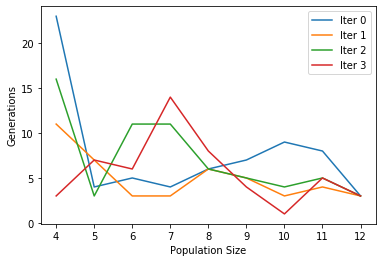

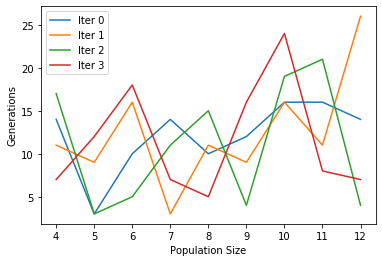

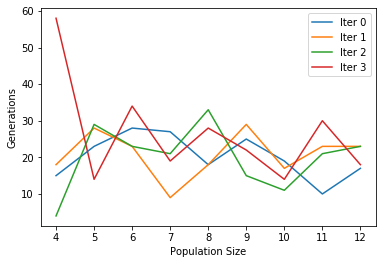

In [184]:
# For Statistical Significance, Running Algorithm 4 times.
ITERATIONS = 4 
pop_sizes = [4,5,6,7,8,9,10,11,12]

bit_sizes = [8, 12, 16]
for bit_size in bit_sizes:    
    results = []
    

#     pop_sizes = range(4, 100, 2)
    # bit_sizes = range(8, 128, 2)
    
    for l in range(0,ITERATIONS):
        re = []
        for pop_size in pop_sizes:
            re.append(genitic_algorithm(bit_size, pop_size))
        results.append(re)
    #         print(f'bit {bit_size} pop {pop_size}')
#     print(results)

    x1 = pop_sizes

    x2 = bit_sizes

    lines = []
    
    for l in range(0,ITERATIONS):
        res = results[l]
#         print(res)
#         res = list(filter( lambda x: x['number_of_bits'] == bit_size, results))
    #     print(res)
        res = sorted(res, key=lambda x:x['population_size'])
#         print(res)
        num_gen = list(map(lambda x: x['generations'], res))
    #     print(x1)
#         print(num_gen)
        plt.plot(x1, num_gen, label = f'Iter {l}')

    # y = list(map(lambda x: x['generations']), results)
    plt.xlabel('Population Size')
    # Set the y axis label of the current axis.
    plt.ylabel('Generations')
    plt.legend()

    # plt.plot(x1, y, label = "Change in Chromosome")
    # plt.plot(x1, y, label = "Change in Population")
    plt.show()

    # plt.legend()

    # plt.plot(x1, y, label = "Change in Chromosome")
    # plt.plot(x1, y, label = "Change in Population")
    plt.show()
    
#   Number of Generations to solution Decreases slightly as Population Sizes increase. 

## Part 3: Chromosome Length vs number of generations

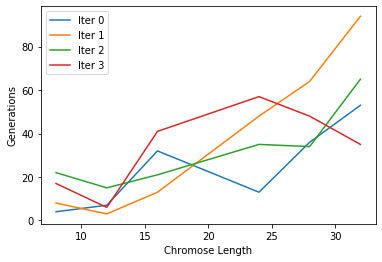

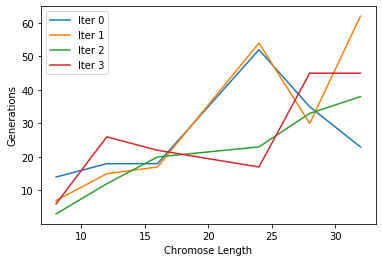

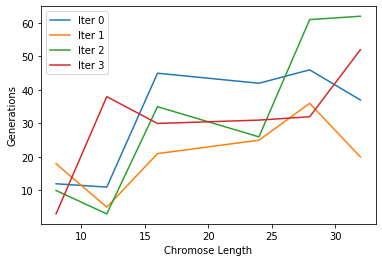

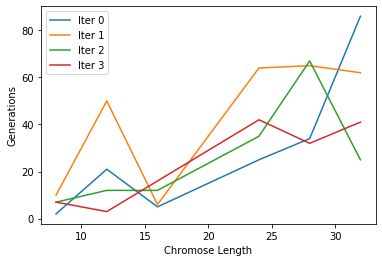

In [175]:
# For Statistical Significance, Running Algorithm 4 times.
ITERATIONS = 4 
pop_sizes = [4,6,8,10]
bit_sizes = [8, 12, 16, 24, 28, 32]
for pop_size in pop_sizes:    
    results = []
    
    for l in range(0,ITERATIONS):
        re = []
        for bit_size in bit_sizes:
            re.append(genitic_algorithm(bit_size, pop_size))
        results.append(re)


    x1 = pop_sizes

    x2 = bit_sizes

    lines = []
    
    for l in range(0,ITERATIONS):
        res = results[l]
#         print(res)
#         res = list(filter( lambda x: x['number_of_bits'] == bit_size, results))
    #     print(res)
        res = sorted(res, key=lambda x:x['population_size'])
#         print(res)
        num_gen = list(map(lambda x: x['generations'], res))
    #     print(x1)
#         print(num_gen)
        plt.plot(x2, num_gen, label = f'Iter {l}')


    plt.xlabel('Chromose Length')
    
    # Set the y axis label of the current axis.
    plt.ylabel('Generations')
    plt.legend()

    # plt.plot(x1, y, label = "Change in Chromosome")
    # plt.plot(x1, y, label = "Change in Population")
    plt.show()

    # plt.legend()

    # plt.plot(x1, y, label = "Change in Chromosome")
    # plt.plot(x1, y, label = "Change in Population")
    plt.show()
    
#   Number of Generations to solution increase as Chromosome Length increase. 

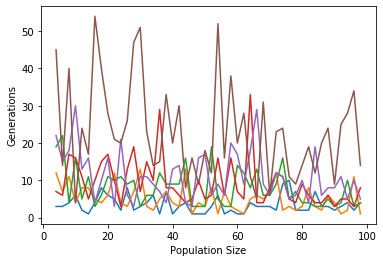

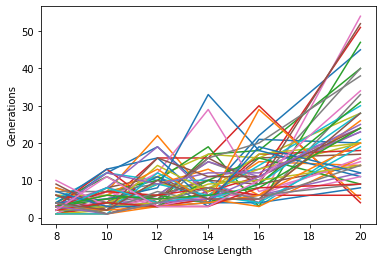

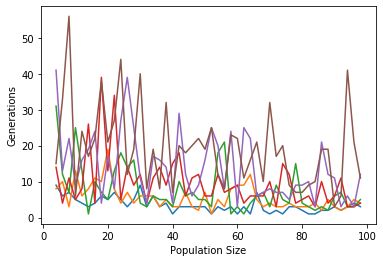

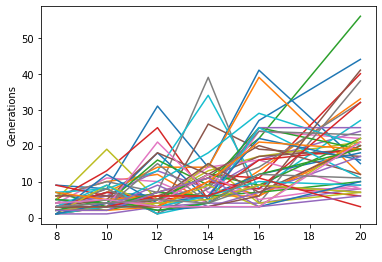

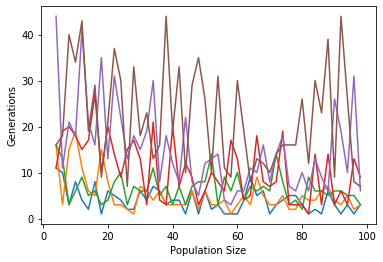

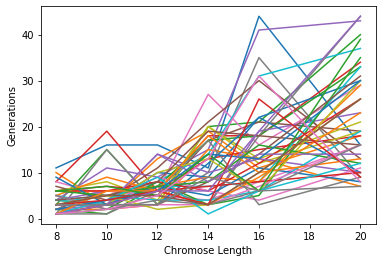

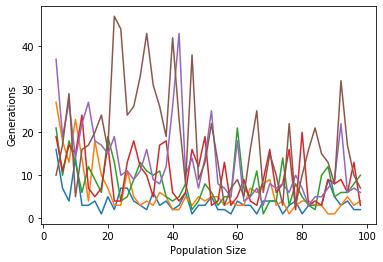

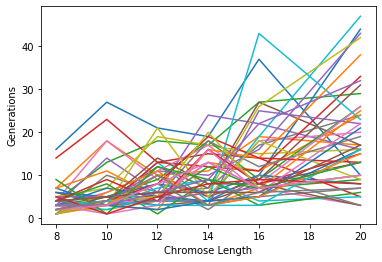

In [174]:

for l in range(0,4):
    results = []
    pop_sizes = [4,5,6,7,8,9,10]
    bit_sizes = [8, 10, 12, 14, 16, 20,]
    pop_sizes = range(4, 100, 2)
    # bit_sizes = range(8, 128, 2)
    
    for pop_size in pop_sizes:
        for bit_size in bit_sizes:
            results.append(genitic_algorithm(bit_size, pop_size))
    #         print(f'bit {bit_size} pop {pop_size}')
    # print(results)

    x1 = pop_sizes

    x2 = bit_sizes

    lines = []
    
    for bit_size in bit_sizes:
        res = list(filter( lambda x: x['number_of_bits'] == bit_size, results))
    #     print(res)
        res = sorted(res, key=lambda x:x['number_of_bits'])
    #     print(res)
        num_gen = list(map(lambda x: x['generations'], res))
    #     print(x1)
    #     print(num_gen)
        plt.plot(x1, num_gen, label = f'pop {bit_size}')

    # y = list(map(lambda x: x['generations']), results)
    plt.xlabel('Population Size')
    # Set the y axis label of the current axis.
    plt.ylabel('Generations')
    # plt.legend()

    # plt.plot(x1, y, label = "Change in Chromosome")
    # plt.plot(x1, y, label = "Change in Population")
    plt.show()



    for pop_size in pop_sizes:
        res = list(filter( lambda x: x['population_size'] == pop_size, results))
    #     print(res)
        res = sorted(res, key=lambda x:x['number_of_bits'])
    #     print(res)
        num_gen = list(map(lambda x: x['generations'], res))
    #     print(x1)
    #     print(num_gen)
        plt.plot(x2, num_gen, label = f'pop size {pop_size}')

    # y = list(map(lambda x: x['generations']), results)
    plt.xlabel('Chromose Length')
    # Set the y axis label of the current axis.
    plt.ylabel('Generations')
    # plt.legend()

    # plt.plot(x1, y, label = "Change in Chromosome")
    # plt.plot(x1, y, label = "Change in Population")
    plt.show()

## Problem 2

In [105]:
def display_board(board):
    for x in board:
        for y in x:
            print(y, end=' ')
        print()

def board_rows(board):
    return len(board)

def board_cols(board):
    return len(board[0])

def place_queen(board, row, col):
    board[row][col] = 1
    
def remove_queen(board, row, col):
    board[row][col] = 0
    
def row_is_clear(board, row, col):
    r = deepcopy(row)
    c = 0
    while c < board_cols(board):
        if(board[row][c] == 1):
            return False
        c += 1
    return True
    

def upper_diag_is_clear(board, row, col):
    r = deepcopy(row)
    c = deepcopy(col)
    while c >=0 and r < board_rows(board):
        if board[r][c] == 1:
            return False
        r += 1
        c -= 1
    return True
def lower_diag_is_clear(board, row, col):
    r = deepcopy(row)
    c = deepcopy(col)
    while r >=0 and col >= 0:
        if board[r][c] == 1:
            return False
        r -= 1
        c -= 1
    return True
    
def is_safe(board, row, col):
#     print(lower_diag_is_clear(board, row, col))
#     print(row_is_clear(board, row, col))
#     print(upper_diag_is_clear(board, row, col))
    return lower_diag_is_clear(board, row, col) and row_is_clear(board, row, col) and upper_diag_is_clear(board, row, col)

In [110]:
def solve_queens(board, col):
    if col >= len(board[0]):
        return True
    else:
        for row in range(0, board_rows(board)):
            clear_output(wait=True)
            if(is_safe(board, row, col)):
                place_queen(board, row, col) # Try Queen at position row, col
                display_board(board)
                time.sleep(0.5)
                if(solve_queens(board, col + 1)): # Check next col
                    return True
                remove_queen(board, row, col) # Failed, Remove queen at row, col and continue loop
        return False

In [185]:
size_board = int(input('Enter Board size, e.g 8 : '))
board = [[0 for x in range(0, size_board)] for y in range(0, size_board)]
for x in board:
    for y in x:
        print(y, end=' ')
    print()
solve_queens(deepcopy(board), 0)

1 0 0 0 0 0 0 0 
0 0 0 0 0 0 1 0 
0 0 0 0 1 0 0 0 
0 0 0 0 0 0 0 1 
0 1 0 0 0 0 0 0 
0 0 0 1 0 0 0 0 
0 0 0 0 0 1 0 0 
0 0 1 0 0 0 0 0 


True